In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import math

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
import matplotlib.pyplot as plt
plt.ioff()

In [6]:
import seaborn as sns
sns.set()

In [7]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import data.analysis_tools as tools

# Data Preparation

In [9]:
num_runs = 10
num_roads = 4
num_timesteps = 1000

## Loading

In [10]:
T = np.empty((1, 1000))
T[0] = np.linspace(1, 1000, 1000)

In [11]:
D = np.zeros((num_runs, num_roads, num_timesteps))
for run in range(1, num_runs + 1):
    D[run-1] = np.loadtxt("raw/route_choice/dis/run{}.txt".format(run)).T

## Error Calculation

In [12]:
def root_mean_square(X, expected=np.array([10, 20, 30, 40])):
    n = len(X)
    return math.sqrt(sum((x-y)**2 for x,y in zip(X, expected)))

In [13]:
E = np.zeros((num_runs, num_timesteps))

In [14]:
for run in range(num_runs):
    for timestep in range(num_timesteps):
        E[run][timestep] = root_mean_square(D[run].T[timestep])

## Splitting Training and Testing Sets

In [15]:
T_train, T_test, E_train, E_test = train_test_split(T.T, E[0], test_size=0.33, random_state=42)

# Data Visualization

<IPython.core.display.Javascript object>


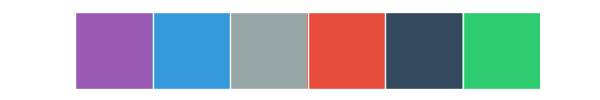

In [16]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(colors))
plt.show()

In [17]:
plot_lim = 25

In [18]:
_, ax = plt.subplots()

In [19]:
plt.xlim(1, plot_lim)
plt.ylim(1, 50);

In [20]:
for i in range(4):
    sns.regplot(x=T[0][:plot_lim],
                y=D[0][i][:plot_lim],
                ax=ax,
                ci=95,
                marker="+",
                n_boot=1000,
                scatter=False,
                color=colors[i])

<IPython.core.display.Javascript object>


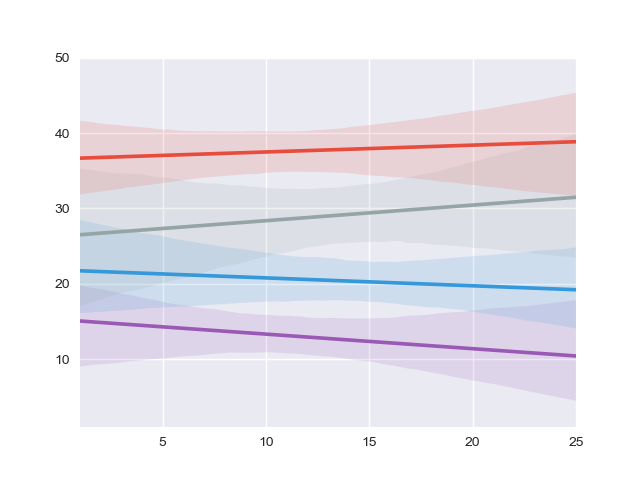

In [21]:
plt.show()

## Root Mean Square Error

### Tests

In [22]:
model = tools.PolynomialRegression(T_train.T, E_train)

In [23]:
rms_model = model.process(degree=5)

In [24]:
y_res = rms_model.predict(T_test.T)

In [25]:
r2_score(E_test, y_res) 

0.31206093018315761

In [26]:
plot_lim = 1000

In [27]:
_, ax = plt.subplots()

In [28]:
plt.xlim(1, plot_lim)
plt.ylim(0, 35);

In [29]:
plt.scatter(T.flat, E[0])

In [30]:
plt.plot(T_test.T.flatten(), y_res, 'ro')

<IPython.core.display.Javascript object>


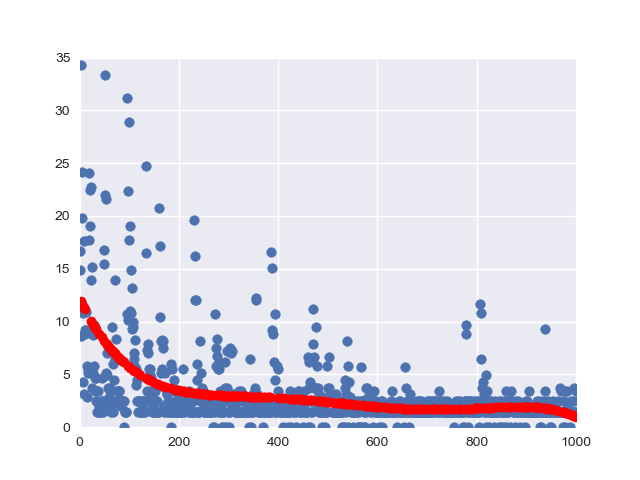

In [31]:
plt.show()

In [32]:
plt.close()